In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy import stats

### Задача 1.
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.  
Даны значения роста в трех группах случайно выбранных спортсменов:  
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.  
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.  
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [2]:
y1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
y2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
y3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

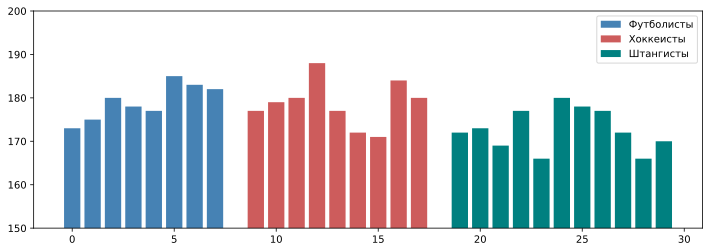

In [17]:
# Визуальное представление данных
y = np.concatenate([y1, [0], y2, [0], y3])
n = len(y)
n1 = y1.size
n2 = y2.size
n3 = y3.size
y1_data = y * 0
y2_data = y * 0
y3_data = y * 0

y1_data[0:n1] = y1
y2_data[n1+1:n1+n2+1] = y2
y3_data[n1+n2+2:n1+n2+n3+2] = y3

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(12)

index = np.arange(n)
ax.bar(index, y1_data, label = 'Футболисты', color = 'steelblue')
ax.bar(index, y2_data, label = 'Хоккеисты',  color = 'indianred')
ax.bar(index, y3_data, label = 'Штангисты',  color = 'teal')

plt.ylim(150, 200)
ax.legend()
plt.show()

#### Гипотеза H0;
* mu1 = mu2 = m3;   Вид спорта не оказывает статистически значимого влияния на рост спортсменов

#### Гипотеза H1;
* mu1 <> mu2 <> m3; Вид спорта оказывает статистически значимое влияние на рост спортсменов

#### 1. Вариант (с помощью библиотечных функций)

In [4]:
result = stats.f_oneway(y1, y2, y3)
Fp     = result[0]
pvalue = result[1]

k = 3
df1 = k - 1
df2 = y1.size + y2.size + y3.size - k
print('df1 =', df1)
print('df1 =', df2)

alpha = 0.05
Ft = 3.38
print(f'Уровень значимости alpha  = {alpha}')
print()
print(f'Критерий Фишера табличный Ft = {round(Ft, 6)}')
print(f'Критерий Фишера расчетный Fp = {round(Fp, 6)}')
print(f'p-value = {round(pvalue, 6)}')
print()

if (Fp < Ft):
    print(f'Вывод: Fp < Ft: ({round(Fp, 6)} < {round(Ft, 6)}); =>\
          \n\tВерна гипотеза H0; \
          \n\tВид спорта НЕ ОКАЗЫВАЕТ статистически значимого вляния на рост спортсмена на уровне значимости 5%')
else:
    print(f'Вывод: Fp > Ft: ({round(Fp, 6)} > {round(Ft, 6)}); =>\
          \n\tВерна гипотеза H1; \
          \n\tВид спорта ОКАЗЫВАЕТ статистически значимое вляние на рост спортсмена на уровне значимости 5%')

df1 = 2
df1 = 25
Уровень значимости alpha  = 0.05

Критерий Фишера табличный Ft = 3.38
Критерий Фишера расчетный Fp = 5.500053
p-value = 0.010482

Вывод: Fp > Ft: (5.500053 > 3.38); =>          
	Верна гипотеза H1;           
	Вид спорта ОКАЗЫВАЕТ статистически значимое вляние на рост спортсмена на уровне значимости 5%


#### 2. Вариант (с помощью формул)

In [5]:
# Средне групповые значения (средние по каждой выборке)
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

# Общее среднее (по всем данным)
y_all = np.concatenate([y1, y2, y3])
y_mean = y_all.sum() / y_all.size

print (f'y1_mean = {round(y1_mean, 2)}')
print (f'y2_mean = {round(y2_mean, 2)}')
print (f'y3_mean = {round(y3_mean, 2)}\n')

print (f'y_mean  = {round(y_mean, 2)}\n')

#----------------------------------------------------------------------------------------------------
# Сумма квадратов отклонений наблюдений от общего среднего
s2 = np.sum( (y_all - y_mean)**2 )

# Сумма квадратов отклонений средних групповых значений от общего среднего
s2_f = ((y1_mean - y_mean)**2) * n1 + \
        ((y2_mean - y_mean)**2) * n2 + \
        ((y3_mean - y_mean)**2) * n3

# Остаточная сумма квадратов отклонений
s2_residual = np.sum((y1 - y1_mean)**2) + \
                np.sum((y2 - y2_mean)**2) + \
                np.sum((y3 - y3_mean)**2)

print (f's2          = {round(s2, 6)}')
print (f's2_f        = {round(s2_f, 6)}')
print (f's2_residual = {round(s2_residual, 6)}\n')

#----------------------------------------------------------------------------------------------------
# Проверка соблюдения равенство: s2 = s2_f + s2_residual
print(f's2 = s2_f + s2_residual: {round(s2, 6)} = {round(s2_f, 6)} + {round(s2_residual, 6)} = \
{round(s2_f, 6) + round(s2_residual, 6)}\n')

#----------------------------------------------------------------------------------------------------
# Общая дисперсия
sigma2_general = s2 / (n - 1)

# Факторная дисперсия
sigma2_f = s2_f / (k - 1)

# Остаточная дисперсия
sigma2_residual = s2_residual / (n - k)

print (f'sigma2_general  = {round(sigma2_general, 6)}')
print (f'sigma2_f        = {round(sigma2_f, 6)}')
print (f'sigma2_residual = {round(sigma2_residual, 6)}\n')

#----------------------------------------------------------------------------------------------------
# Критерий Фишера расчетный
Fp = sigma2_f / sigma2_residual
print (f'Fp = {round(Fp, 6)}')

y1_mean = 179.12
y2_mean = 178.67
y3_mean = 172.73

y_mean  = 176.46

s2          = 830.964286
s2_f        = 253.907468
s2_residual = 577.056818

s2 = s2_f + s2_residual: 830.964286 = 253.907468 + 577.056818 = 830.964286

sigma2_general  = 28.653941
sigma2_f        = 126.953734
sigma2_residual = 21.372475

Fp = 5.940058


In [6]:
if (Fp < Ft):
    print(f'Вывод: Fp < Ft: ({round(Fp, 6)} < {round(Ft, 6)}); =>\
          \n\tВерна гипотеза H0; \
          \n\tВид спорта НЕ ОКАЗЫВАЕТ статистически значимого вляния на рост спортсмена на уровне значимости 5%')
else:
    print(f'Вывод: Fp > Ft: ({round(Fp, 6)} > {round(Ft, 6)}); =>\
          \n\tВерна гипотеза H1; \
          \n\tВид спорта ОКАЗЫВАЕТ статистически значимое вляние на рост спортсмена на уровне значимости 5%')

Вывод: Fp > Ft: (5.940058 > 3.38); =>          
	Верна гипотеза H1;           
	Вид спорта ОКАЗЫВАЕТ статистически значимое вляние на рост спортсмена на уровне значимости 5%
